# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

1. The DataFrame has 9 columns as mentioned in the Data Dictionary.
2. Data in each row corresponds to the order placed by a customer.


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:  
1. There is 4 object datatype column with 5 numerical datatypes
2. All the columns have 1898 observations , which means none of the column has null values
3. order_id,customer_id,cost_of_the_order , food_preparation_time and delivery_time columns are numerical columns while the rest are categorical in nature



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()
df.isna().sum()
# We observe that all the columns have equal number of rows which concludes that there is no missing values in the data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
We observe that all the columns have equal number of rows which concludes that there is no missing values in the data  


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
 1. Minimum food preparation time = 20.00
 2. Average food preparation time = 27.372
 3. Maximum food preparation time = 35.00
 4. The cost_of_the_order ranges from around 4.470 dollars to 35 dollars while the average bill amount is around 16.5 dollars. Half of the bill amounts are less than 14.2 dollars which indicate that most of the orders are not very costly.
             


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# filter dataset with rating equal to 'Not given' , calculate value_counts and then sum all of them
df[df['rating']=='Not given'].value_counts().sum()


736

#### Observations:
There are 736 orders which are not rated



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

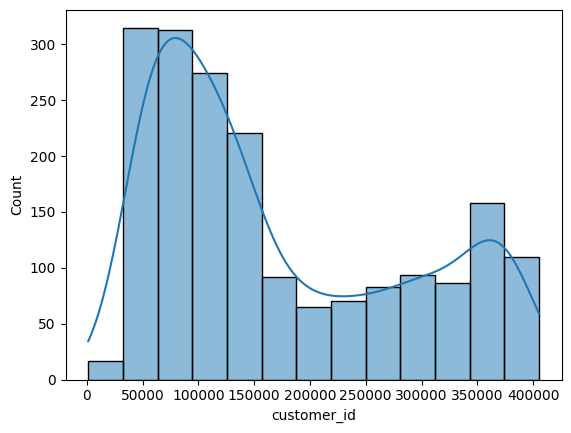

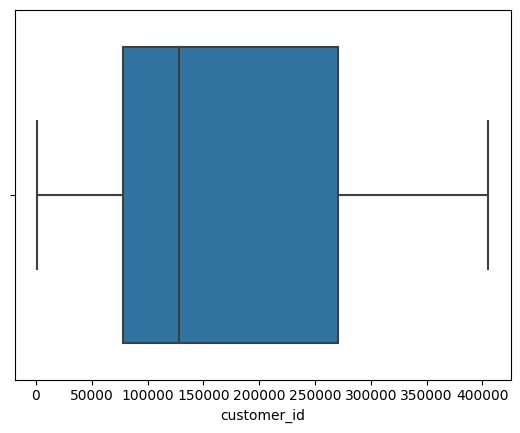

In [ ]:
sns.histplot(data=df,x='customer_id',kde=True)
plt.show();

sns.boxplot(data=df,x='customer_id')
plt.show()

Observations

 Customer's with ID between 4000 - 150000 has ordered food , which are highest in count approx 900 times .

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


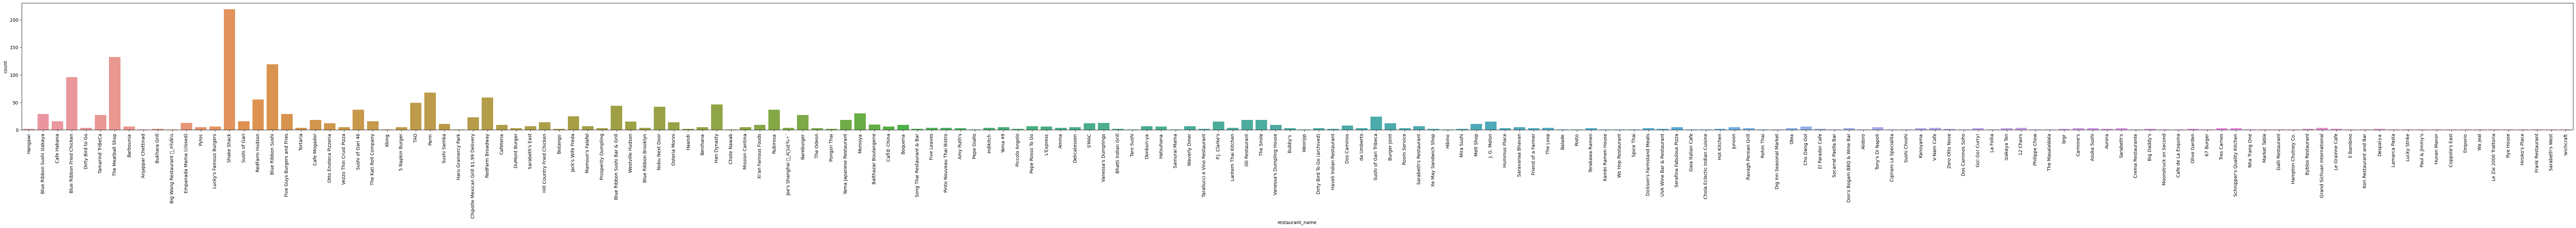

In [ ]:
plt.figure(figsize=(100,5))
sns.countplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show();

Observations

Shake shack has the highest orders placed by customers > 200





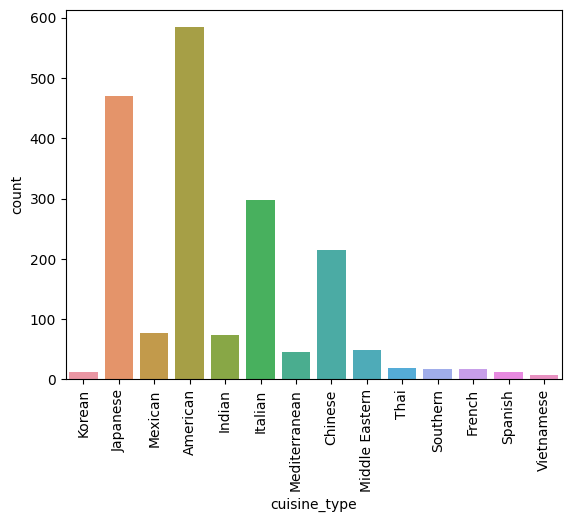

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show();

Observation

1. Customers liked to order American cuisine followed by japanese . This cuisine was ordered more than 550 times.

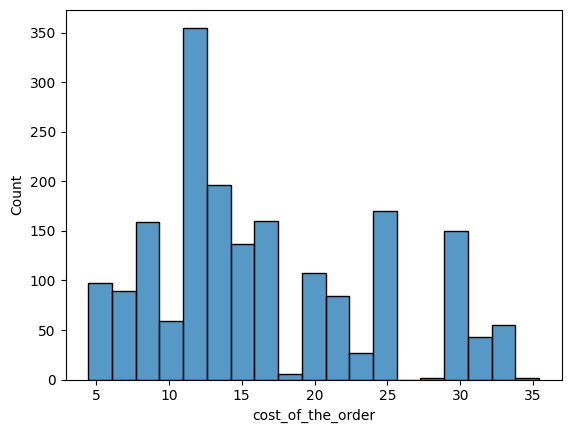

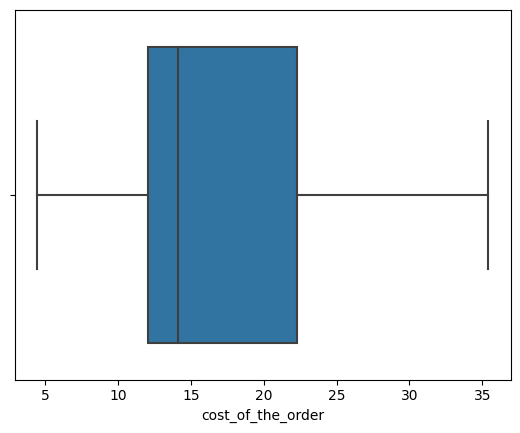

In [ ]:

sns.histplot(data=df,x='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

# plt.figure(figsize=(200,7))
# sns.countplot(data=df,x='cost_of_the_order')
# plt.xticks(rotation=90)
# plt.show();

Observations

1. Minimum cost of the order is $5.

2. Maximum cost of the order is $35

3. Median is closer to the left of the box , we say that the distribution is positively skewed(Right skewed)

4. Median price is around $14

5. Total count for the cost of the order ranging from $12 to $13 approx to 350 , which is the highest

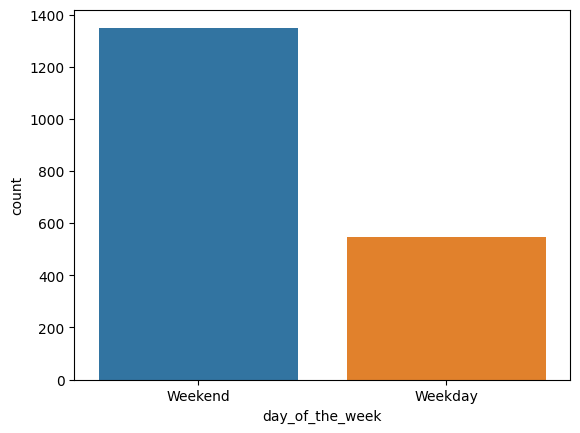

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

Observations

Customers placed more order on weekends  which is 3x times  than in weekday

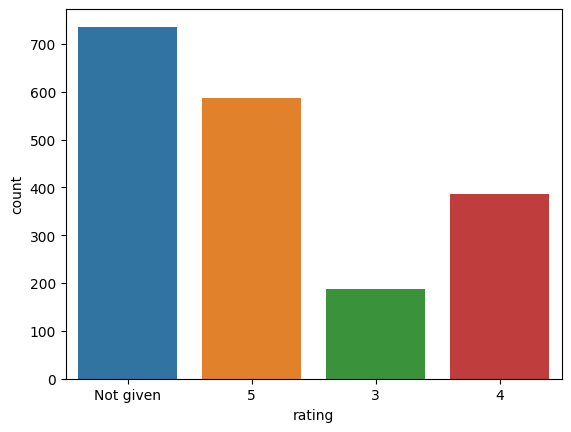

In [ ]:
sns.countplot(data=df, x='rating');

Observations

1. Out of 1898 , rating was not given  for approx 700 orders .

2. 200 plus orders got 3 rating .

3. Approx 600 orders got 5 rating .

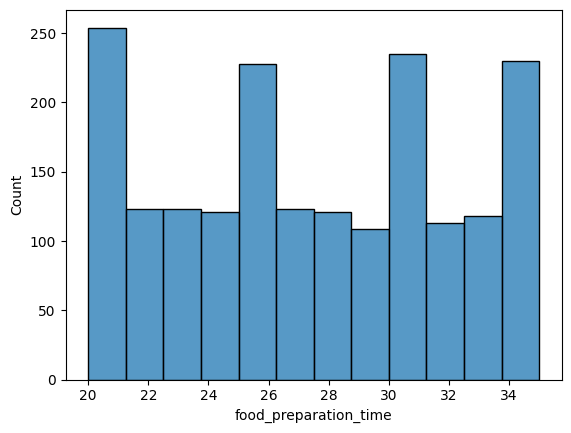

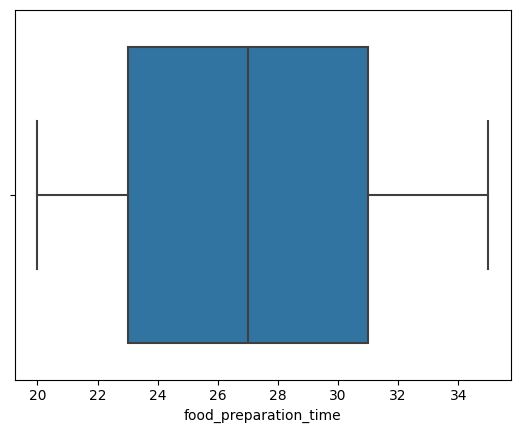

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show();

sns.boxplot(data=df,x='food_preparation_time')
plt.show();

Observations

1. Minimum time for food preparation is 20 min
2. Maximum time for food preparation is 35 min
3. Mean and Median is approx equal which is 27
4. Boxplot shows that there is no outliers
5. Boxplot shows that there is no skewness in the data




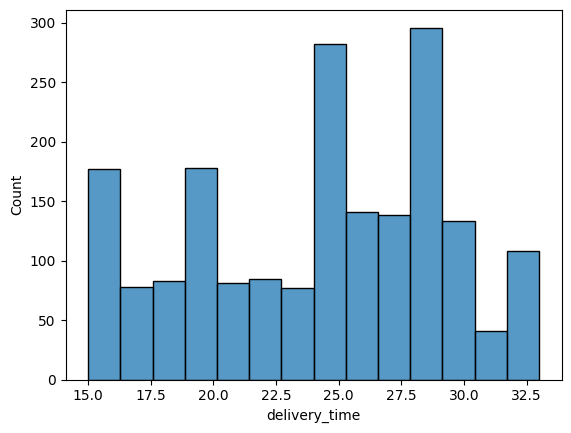

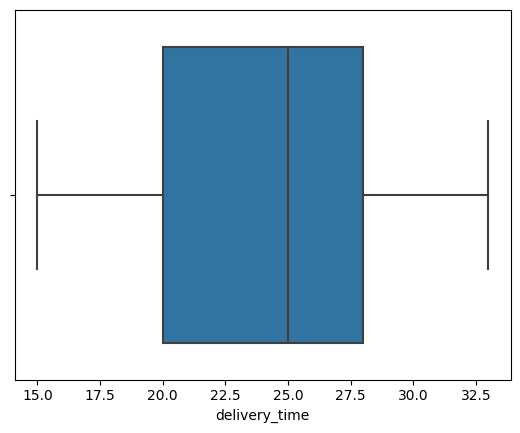

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show();

sns.boxplot(data=df,x='delivery_time')
plt.show();

1. Minimum time for food delivery is 15 min
2. Maximum time for food delivery is 34.5 min
3. Median is 25 min , which is greater than the mean 24.5 , which shows that the distribution is left skewed


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

#another way to find the top 5 restaurants in terms of the number of orders received
#df.groupby(['restaurant_name']).count().sort_values('order_id',ascending=False).head(5)[['order_id']]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

From the results above top 5 resturants are -

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
#df.groupby(['cuisine_type','day_of_the_week']).count().sort_values('order_id',ascending=False).head(1)['order_id']
#df[df['day_of_the_week']=='Weekend'].value_counts()
#df[df['day_of_the_week']=='Weekend'].groupby('cuisine_type').count().sort_values('order_id',ascending=False).head(1)['order_id']
df_weekends = df[df['day_of_the_week']=='Weekend']
df_weekends['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

As we can see from above results , American is the most popular cuisine


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
#100 * df[df['cost_of_the_order'] > 20].count() / df['cost_of_the_order'].count()
100 * (df[df['cost_of_the_order'] > 20].count() / df['cost_of_the_order'].count()).head(1)


order_id   29.241
dtype: float64

#### Observations:

percentage of the orders cost more than 20 dollars is 29.24


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean Order for delivery time is 24.162

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
#df.groupby('customer_id').count().sort_values('order_id',ascending=False).head(3)['order_id']
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: Top 3 frequent customers with IDs and number of orders :
SL.no  customer_id    Number of orders

1.     52832 --           13
2.     47440 --          10
3.     83287 --           9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-22-a092d65e8fe3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidth=1,linecolor='black',cmap='Spectral',vmin=-1, vmax=1, fmt=".2f")


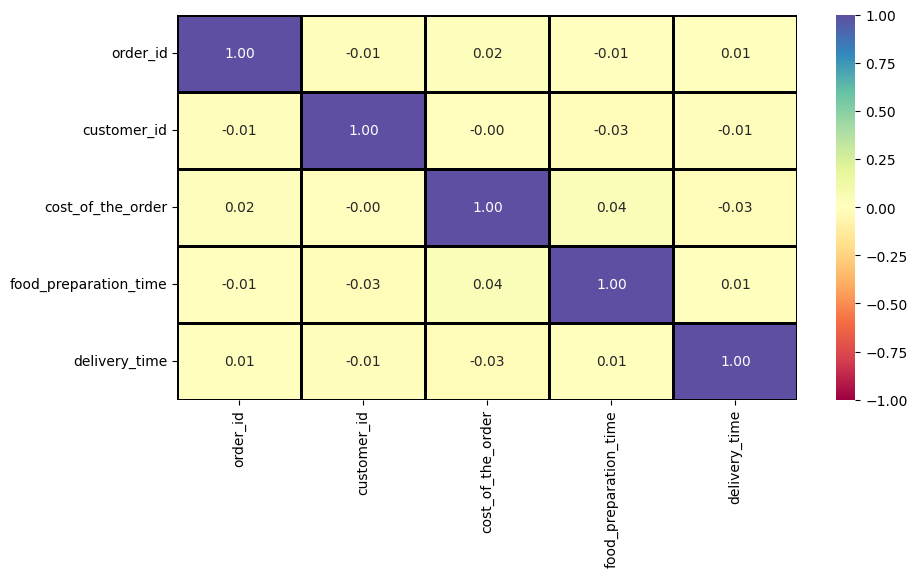

In [ ]:
# Write the code here
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(), annot=True,linewidth=1,linecolor='black',cmap='Spectral',vmin=-1, vmax=1, fmt=".2f")
plt.show();

Observations

cost_of_the_order shows high correlation with food preparation time . This indicates that if the cost of the order is high , preparation of the order takes time .  

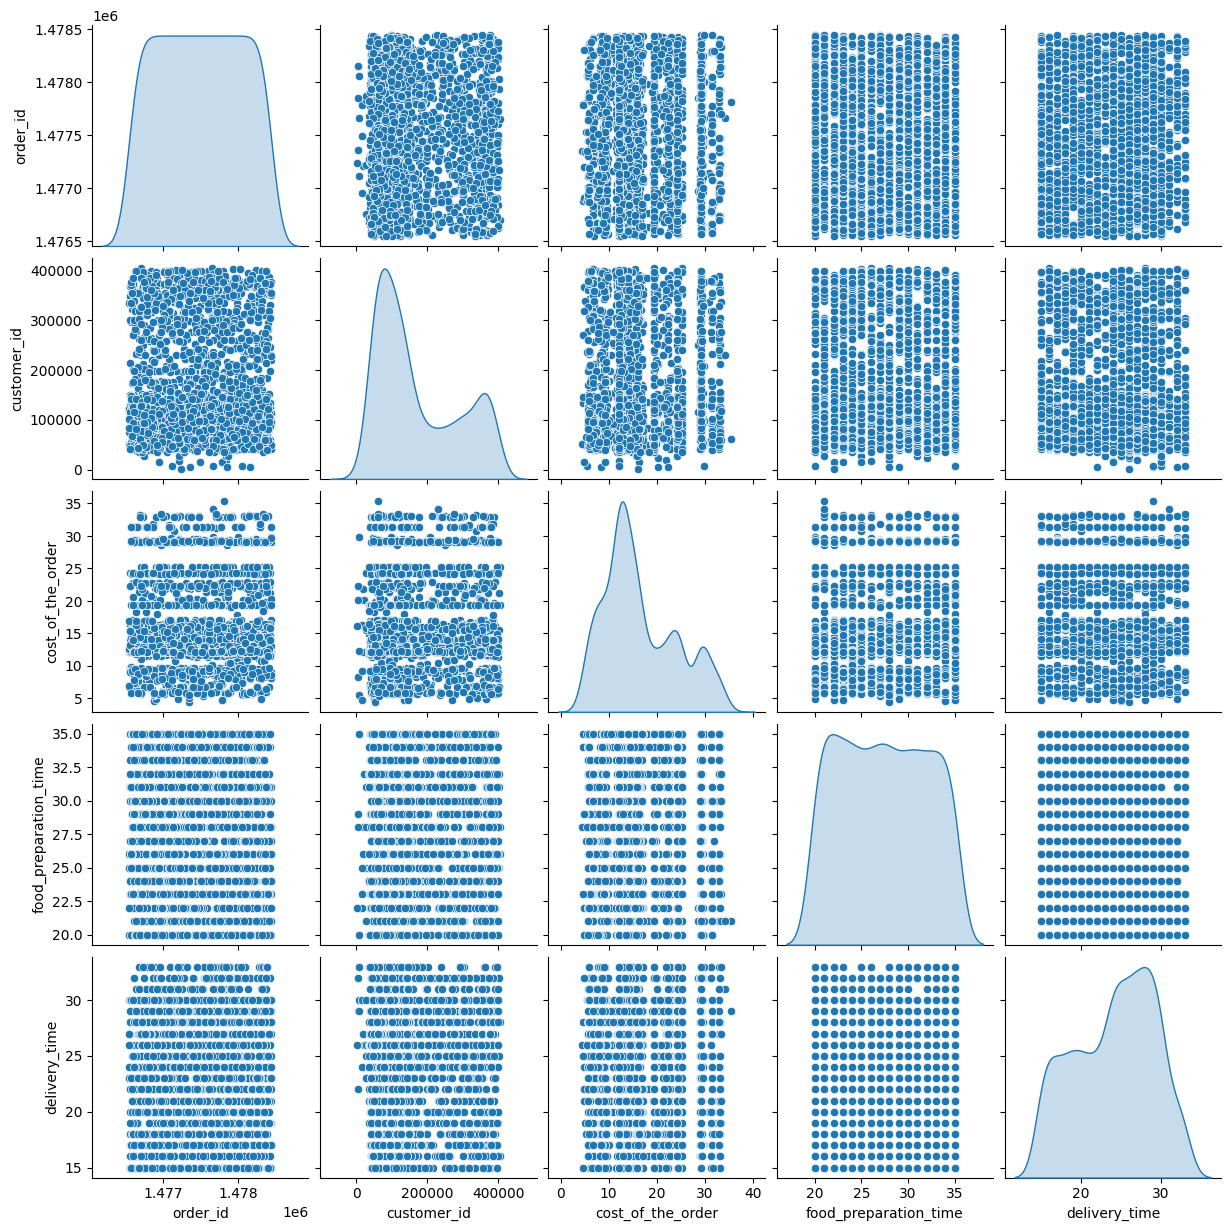

In [ ]:
sns.pairplot(data=df,diag_kind="kde")
plt.show()


Observations

1. We get the same insights as from the correlation plot
2. There does not seem to be a strong relationship between any two variables

<ipython-input-24-f1d0e5e65f5f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x="cost_of_the_order", y="food_preparation_time", estimator='sum', ci=False, color="red")


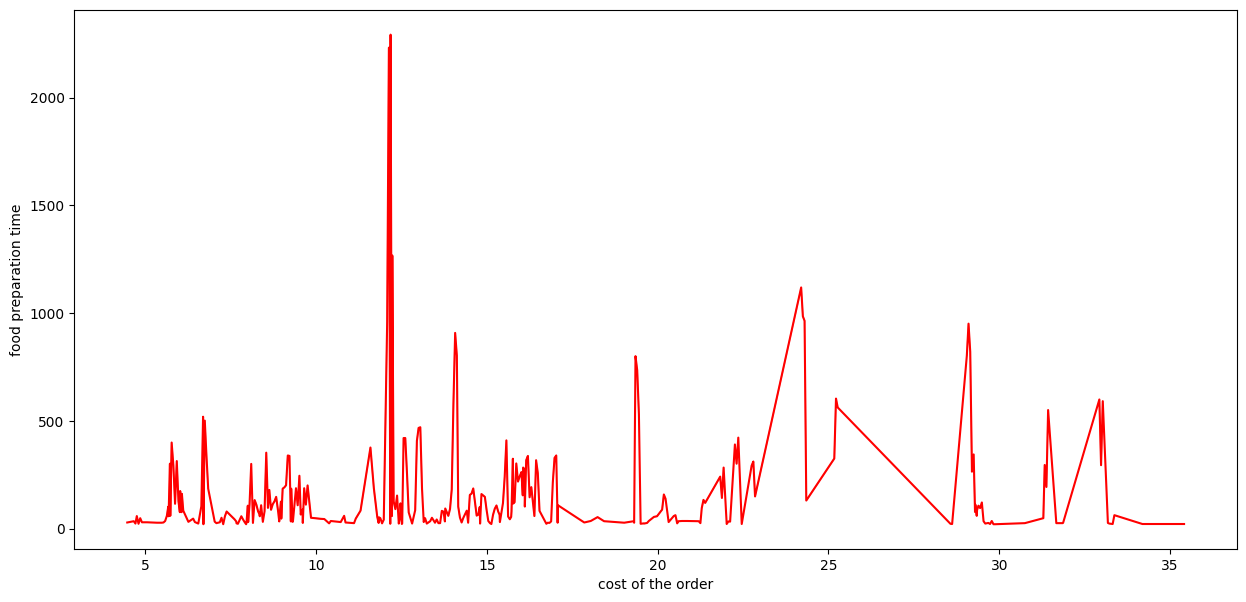

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="cost_of_the_order", y="food_preparation_time", estimator='sum', ci=False, color="red")
plt.ylabel('food preparation time')
plt.xlabel('cost of the order')
plt.show()

Observations

As we can see there is a very weak positive coreleation bewtween food preparation time and cost of the order


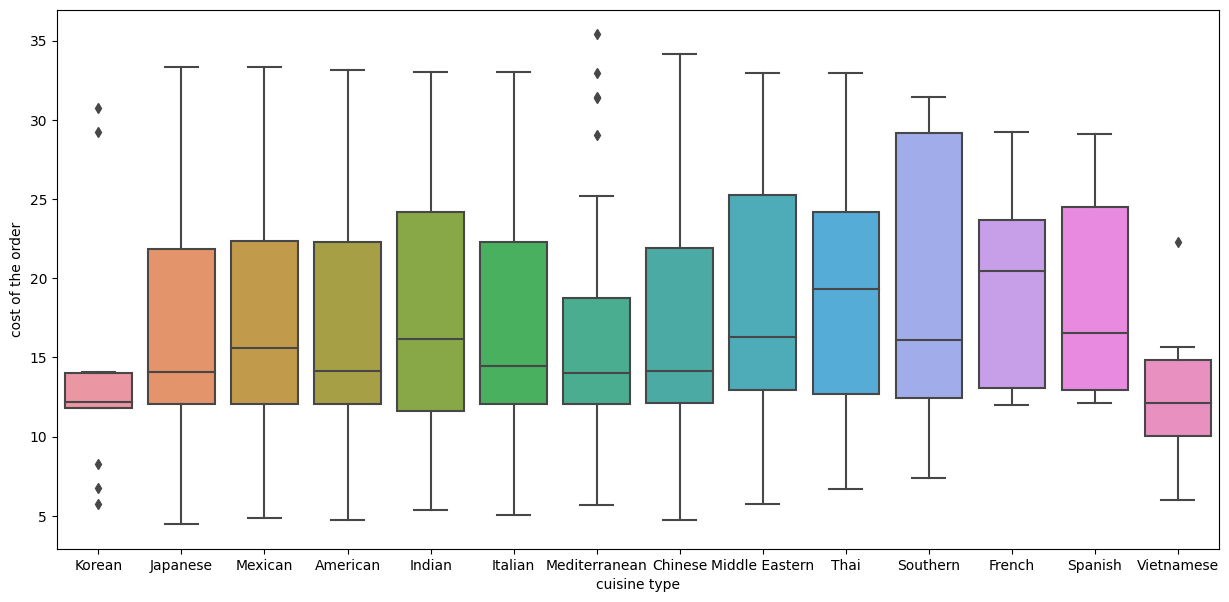

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.ylabel('cost of the order')
plt.xlabel('cuisine type')
plt.show()

Observations

1. Chinese has the highest cost of an order .
2. Median of most of the cuisine 14 to 16 cost of an order .
3. Korean , Miditerranean and Vietnamese has outliers


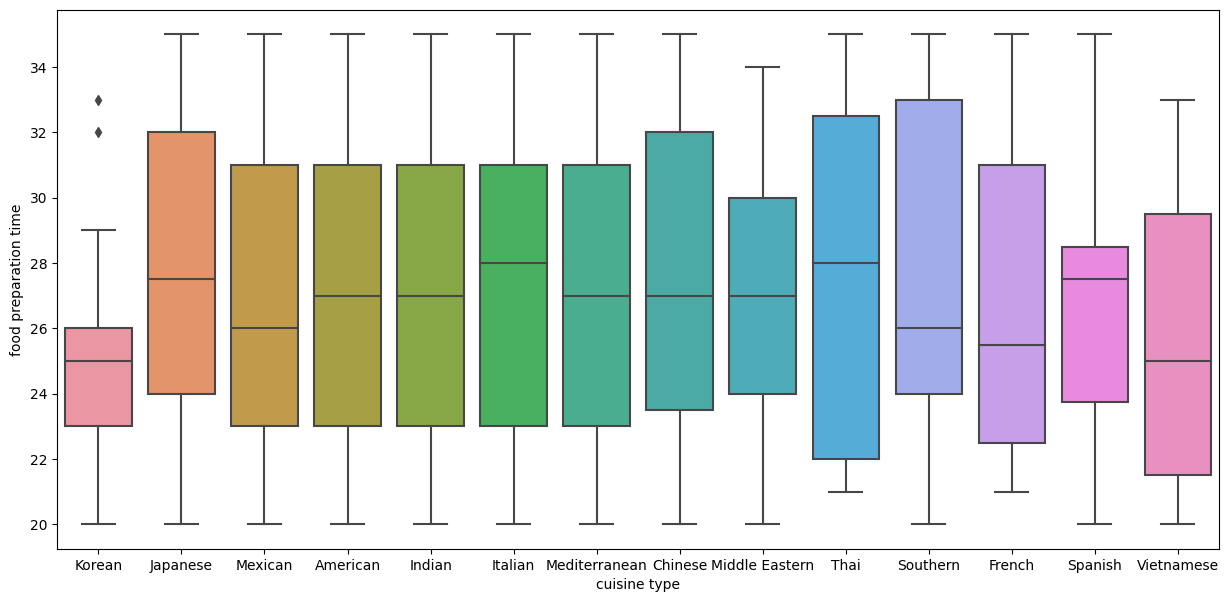

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.ylabel('food preparation time')
plt.xlabel('cuisine type')
plt.show()

Observations

1. 50% of Korean cuisine preparation takes less than all of the  cusine type
2. 50% of Thai cuisine preparation takes more than 50% of all the other cuisine type


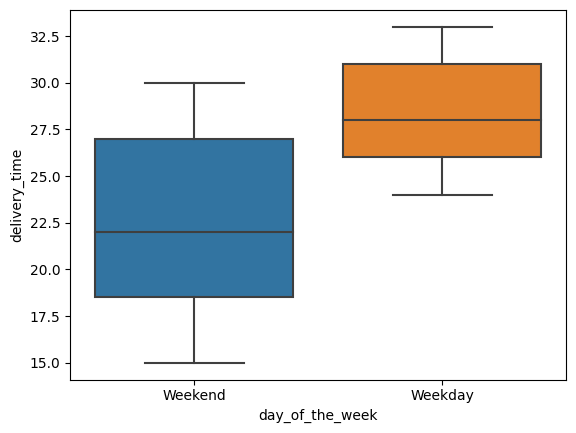

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

Observations



*   Mean delivery time on weekday is more than mean delivery time for weekend
*   Min delivery time for weekend 20 mins and max is around 30 min
*   Min delivery time for weekday 25 mins and max is around 33 min






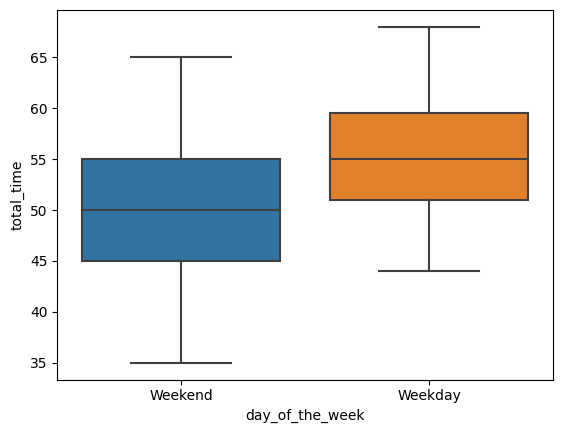

In [ ]:
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
sns.boxplot(data=df,x='day_of_the_week',y='total_time')
plt.show()


Observation 🇰
1. By adding food delivery time with food preparation time , 50% of total_time on weekday is more than 50% on weekend .

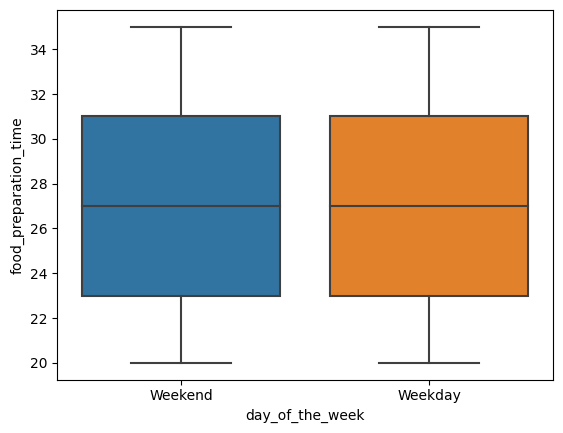

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()

Observations

Weekday and weekend food preparation time is same .

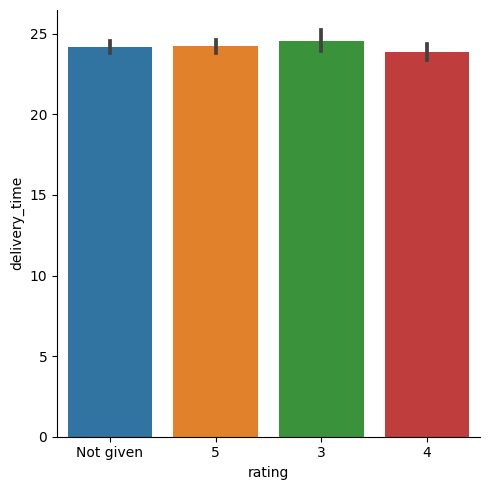

In [ ]:
sns.catplot(x='rating', y='delivery_time', data=df, kind="bar")
plt.xticks()
plt.show()

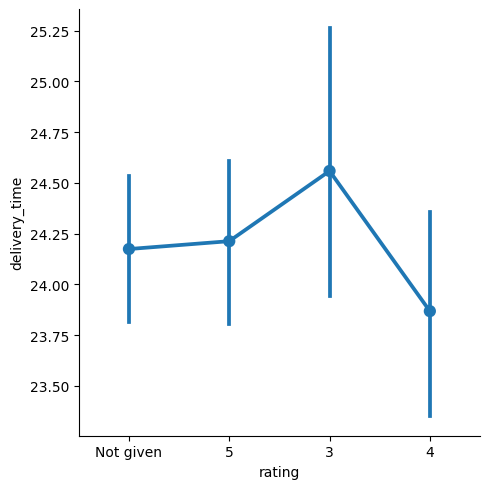

In [ ]:
sns.catplot(x='rating', y='delivery_time', data=df, kind="point")
plt.xticks()
plt.show()

In [ ]:
df.groupby(by = ['rating'])['delivery_time'].mean()

rating
3           24.559
4           23.868
5           24.213
Not given   24.174
Name: delivery_time, dtype: float64

Observations

As shown above , Rating effected by delivery time is minimal . We are not able to draw any conculsion if the rating is effected by delivery time

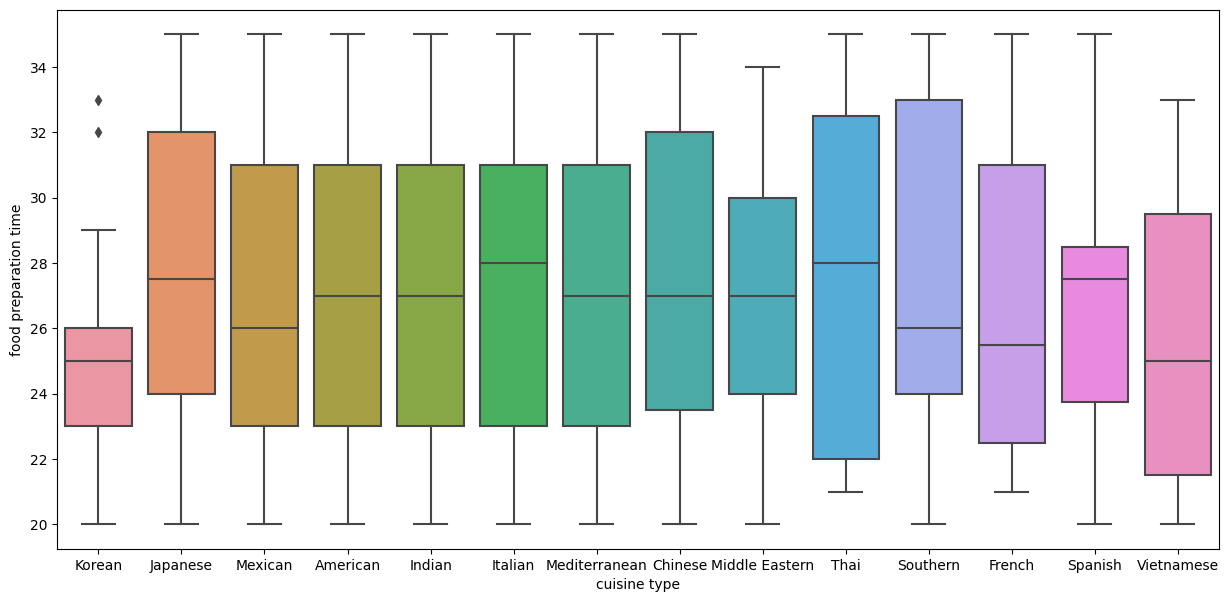

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.ylabel('food preparation time')
plt.xlabel('cuisine type')
plt.show()

Observations

1. 50% of korean cuisine takes less time than other cusinies  
2. There are some outliers for korean cusinine

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#df.head()
df_copy = df.copy()
df_filtered_rating = df_copy[df_copy['rating']!='Not given']

#change it into int type
df_filtered_rating['rating'] = df_filtered_rating['rating'].astype(int)

#Create dataframe to get the rating count per restaurant_name

df_rating_count_per_resturant = df_filtered_rating['restaurant_name'].value_counts().to_frame('rating').reset_index().rename(columns={'index': 'restaurant_name'})

#df_ratings_values = df_rated_orders.groupby(['restaurant_name'])['rating'].count().reset_index()

# filter to get the resturant which has rating count more than 50
resturant_names_gt_50=df_rating_count_per_resturant[df_rating_count_per_resturant['rating']>50]['restaurant_name']

# filter to get the DATAFRAME where resturant has count of ratings more than 50
df_resturant_names = df_filtered_rating[df_filtered_rating['restaurant_name'].isin(resturant_names_gt_50)]

#Calculate mean rating by using group by on resturantant name
resultant_series = df_resturant_names.groupby(['restaurant_name']).rating.mean() > 4
#type(resultant_series)
resultant_series.to_frame().drop('rating', axis=1)


<ipython-input-40-ad836b8d462c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_rating['rating'] = df_filtered_rating['rating'].astype(int)


""
restaurant_name
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


#### Observations:

Resturants which will get promotional offer are

1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#copying data into other dataframe
df_14 = df.copy()
# Create function to apply on the cost_of_the_order column for different conditions
def profit(price):
  if price > 20 :
    return (price * 25)/100
  elif price > 5 :
    return (price *15)/100
  else :
    return 0


df_14['cost_of_company'] = df_14['cost_of_the_order'].apply(profit)

#net revenue generated by the company across all orders . We sum up all the orders
df_14['cost_of_company'].sum()


6166.303

#### Observations:
Total Revenue of the company is 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Copying data into another dataframe
df_15 = df.copy()

# creating one column after merging food_preparation_time and delivery_time columns
df_15['total_time'] = df_15['food_preparation_time'] + df_15['delivery_time']

# calculate percentage orders that takes more than 60 minutes
percentage_of_order = 100* (df_15[df_15['total_time'] > 60].count() / df_15.shape[0])[0]

#round percentage of order to 2 places
percentage_of_order.round(2)

10.54

percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calucate mean delivery time
mean_deliver_time = df['delivery_time'].mean().round(2)

# calculate weekday mean delivery time
weekday_mean_deliver_time = df[df['day_of_the_week']=='Weekday'].delivery_time.mean().round(2)

#calculate weekend mean delivery time
weekend_mean_deliver_time = df[df['day_of_the_week']=='Weekend'].delivery_time.mean().round(2)

mean_deliver_time #24.16
weekday_mean_deliver_time #28.34
weekend_mean_deliver_time #22.47

22.47

#### Observations:
Total mean delivery time is equal to 24.16

Mean delivery time on weekday = 28.34

Mean delivery time on weekend = 22.47

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  Rating is not affected by delivery time .
*  We need more data points to conclude rating dependencies on other variables .
*  Most popular cuisine type is American followed by Japanese , Italian and Chinese .
*  Most of the orders are placed on weekends .
*  Customers have not rated 700 plus orders . We don’t have data which can determine why customers have not rated particular orders .
*  Most popular cuisine on weekend is same as weekday American , Japanese , Italian and Chinese
*  Cost of the order has a very weak positive correlation with food preparation time .
*  Mean Delivery time on weekdays  is more than on weekend .




### Recommendations:

*  American , Japanese , Italian and Chinese are the most popular . Food hub should focus on earning more business for these cuisine type restaurants .
*  Since most of the orders are placed on weekends . Riders availability must be ensured during the weekend .
* On weekdays , delivery time is more than weekends . Food Hub should come up with features that can decrease delivery time on weekends .
* More data should be procured on delivery time , which can determine high delivery time .
*  A machine learning model can be built to accurately predict delivery time at peak hours on weekdays .  
* Promotional offer should be promoted for weekday , to increase business on weekday .
* Data should be procured for rating to get a better understanding of the factors which leads to ratings for the restaurant .




---